# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
- Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.manifold import TSNE

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

Data Import

In [29]:
datav= pd.read_csv('Wholesale_Data.csv')

Data Cleaning

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Dataset is made of 440 rows and 8 columns, no missing values 

Data Description

In [7]:
data.describe() 

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Throughout the data, mean is close to std, and both are closer to max in relation to min. this shows that there might be some skewness in the dataset. Let's confirm this using some visualization- a histogram. 
As predicted our dataset is skewed to the left and this confirm that the dataset have outliers. So we need a way to handle these outliers. 


Data Visualization

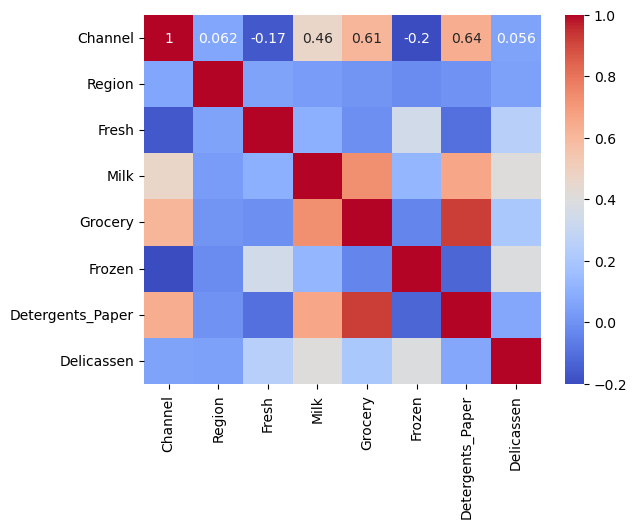

In [82]:
# Compute the correlation matrix
df_final_corr = data.corr()

# Plot the heatmap
sb.heatmap(df_final_corr, annot=True, cmap='coolwarm')
plt.show()

This heatmap is showing some correlation throughout our dataset. There are visible correlatioon such as Grocery and Channel, Grocery and Milk, Milk and Grocery, Detergetns_Paper and Milk, and others. This heatmap shows us the intesity and we will even visualize this further down below by using a pair plot. But first, let's see the distribution. 

Before making any change, we are going to visualize the the distribution of the dataset. 

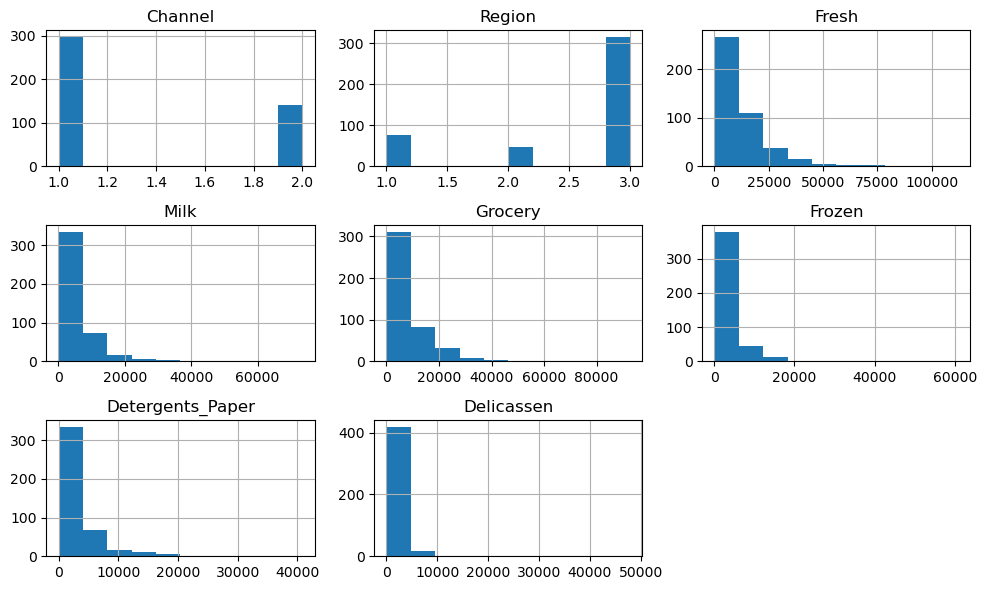

In [15]:
data.hist(figsize = (10, 6))
plt.tight_layout() 
plt.show()

Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.

Let us identify outliers using z-score. Z-score measures how many std. above or below mean are in the dataset. By setting a threshold, we are declaring that anything above or below is outlier. z-score returns a negative value whose absolute value gives a positive. 

In [17]:
threshold = 3
z_score = stats.zscore(data)
outliers = data[abs(z_score) > threshold]
outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           0 non-null      float64
 1   Region            0 non-null      float64
 2   Fresh             7 non-null      float64
 3   Milk              9 non-null      float64
 4   Grocery           7 non-null      float64
 5   Frozen            6 non-null      float64
 6   Detergents_Paper  10 non-null     float64
 7   Delicassen        4 non-null      float64
dtypes: float64(8)
memory usage: 27.6 KB


We filtered through the dataset to get only the outliers, and we will use it to decide if it is a significant number in our datasetThe outliers are present in all features and considering the our dataset (440) and the outliers (43), it is a significant number

Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.

We can use pandas' corr. to calculate the correlation coefficients. We'll calculate the possible correlation coefficients throughout our dataset. However, to better understand what is going on, we will visualize the results using a pairplot.

In [18]:
correlation_matrix = data.corr()
print(correlation_matrix)

                   Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.062028 -0.169172  0.460720  0.608792 -0.202046   
Region            0.062028  1.000000  0.055287  0.032288  0.007696 -0.021044   
Fresh            -0.169172  0.055287  1.000000  0.100510 -0.011854  0.345881   
Milk              0.460720  0.032288  0.100510  1.000000  0.728335  0.123994   
Grocery           0.608792  0.007696 -0.011854  0.728335  1.000000 -0.040193   
Frozen           -0.202046 -0.021044  0.345881  0.123994 -0.040193  1.000000   
Detergents_Paper  0.636026 -0.001483 -0.101953  0.661816  0.924641 -0.131525   
Delicassen        0.056011  0.045212  0.244690  0.406368  0.205497  0.390947   

                  Detergents_Paper  Delicassen  
Channel                   0.636026    0.056011  
Region                   -0.001483    0.045212  
Fresh                    -0.101953    0.244690  
Milk                      0.661816    0.406368  
Grocery                   0.924641

let'us use our correlation matrix and visualize the correlation on a pair plot

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

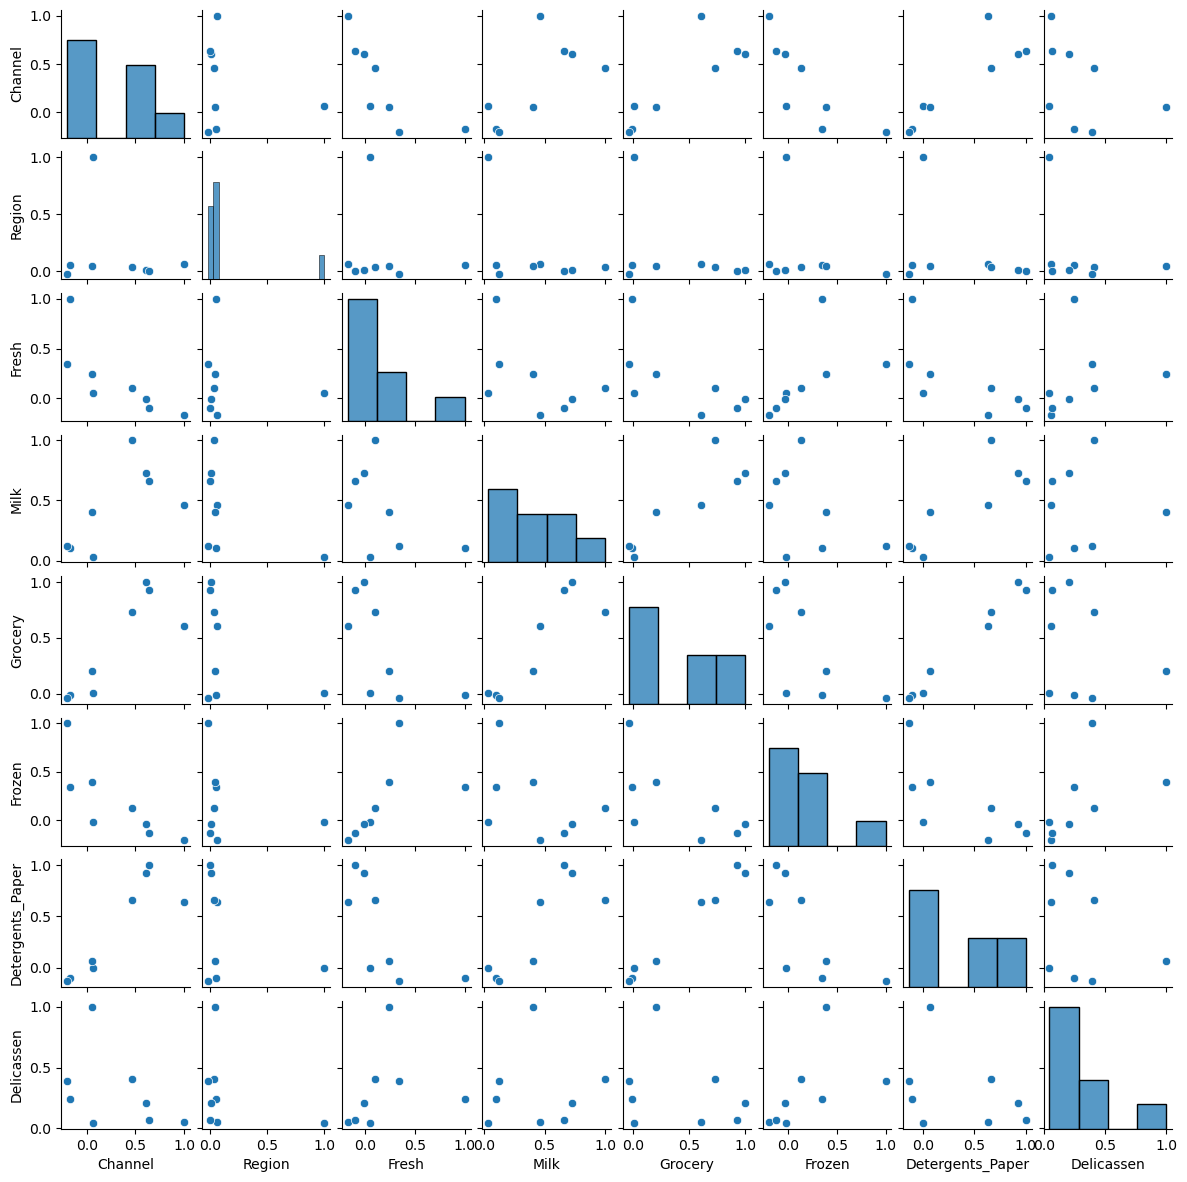

In [19]:
sb.pairplot(correlation_matrix, height = 1.5)

This pairplot gives us insights into correlation among the variables: 
1. Channel: has a positive correlation with Region, Milk, Grocery, Detergetns_Paper
2. Region: has a positive and similar correlation with all features
3. Fresh: has a positive correlation with Region, Milk, Frozen and Delicassen
4. Milk: has positive correlaton with Channel, Fresh, Grocery, Detergents_Paper, and Delicassen
5. Frozen: has a positive correlatin with Milk, Detergents_Paper, and Delicassen
6. Detergents_Paper: has a positive correlatin with Channel, Milk, Grocery, Delicassen
7. Delicassen: has a positive correlation with Fresh,  Milk, Fresh, Grocery, and Frozen

Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.

Our data has a few outliers. We have a few options here. We can either remove them from the dataset or transform them on some way. Since outliers are significant we cannot remove them. 
We will transform them in same way. Let's go with clipping which will do the following: 

1. round up anything above 0.95 percentile
2. round down anything below 0.5 percentile

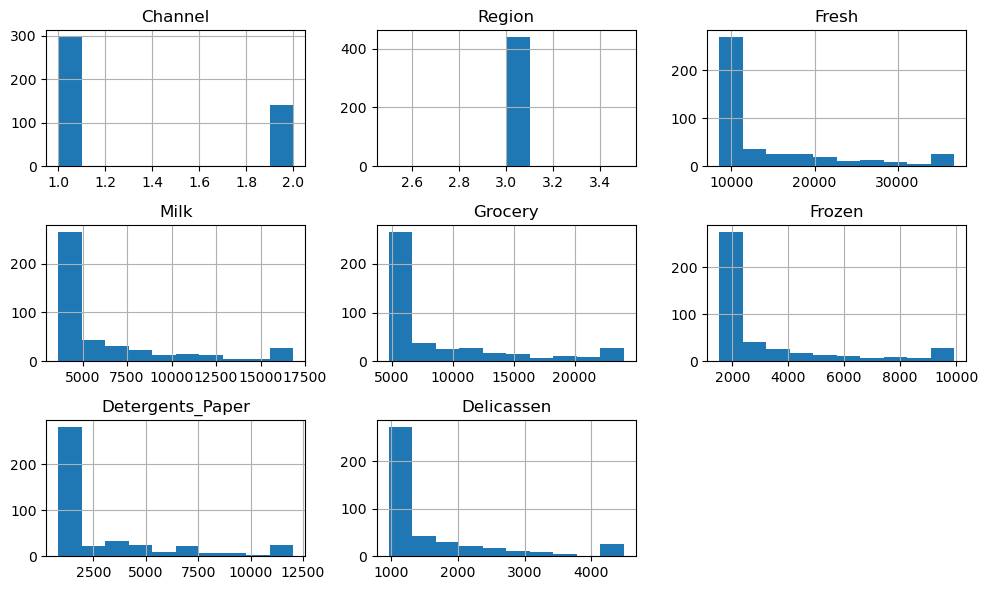

In [21]:
up = data.quantile(0.95)
bottom = data.quantile(0.5)

clipped_df = data.clip(upper = up, lower = bottom, axis = 1) 
new_df = clipped_df

# Visualize the clipped data
new_df.hist(figsize = (10, 6))
plt.tight_layout() 
plt.show()

Comparing this histogram to the original one, there is a change in data distribution. These graphs are a bit better compared to the df dataset because now we clipped overarching outliers and came up with a new dataset (new_df)

Feature Selection

We will use PCA to find the features that contribute the least to overall variance and retain the maximum number of features that would not affect our clusters. 

In [52]:
#StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_df)

#fit on PCA and get evr, and cv of ratio
pca = PCA()
pca.fit(data_scaled)
explained_var_ratio = pca.explained_variance_ratio_
cumul_var_ratio = explained_var_ratio.cumsum()

#we will set percentage explained by features and use it to get features, then fit t PCA
perc_explained = 0.95
nber_features = np.argmax(cumul_var_ratio >= perc_explained) + 1

pca = PCA(n_components = nber_features)
pca.fit(data_scaled)

#we will get the principal features, and their names
feats = pca.components_
feat_names = new_df.columns

#We turn it into a dataframe
feats_sel_df = pd.DataFrame(feats.T, columns=[f'PC{i+1}' for i in range(nber_features)], index=feat_names)



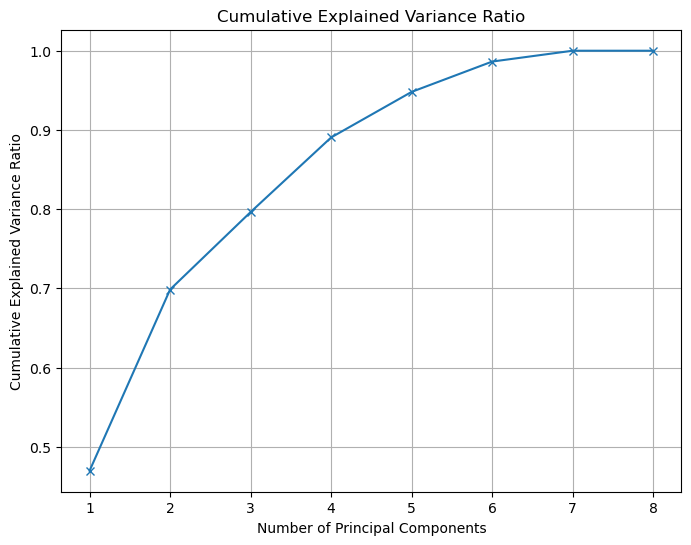

In [50]:
#visualization. I will use explained_var_ratio and cumul_var_ratio
plt.figure(figsize = (8, 6))
plt.plot(range(1, len(cumul_var_ratio) + 1), cumul_var_ratio, marker = 'x', )
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

The plot above  displays the features that contribute the most to the overall variance in the dataset. This is done using principal component analysis (PCA). We can see that Reaching at Feature 7 already explains almost all the featuers and feature 8 totally explais the most. Therefore, anything that would come beyond Feature 8 would be removed but in this case removing Feature 8 would impact our dataset. 

Another observation is that given the information provided, it's not possible to make a definitive decision about dimensionality reduction, and further analysis considering additional factors is needed.

So, In terms of dimensionality reduction, let's keep all of our features. Another important aspect of dimensionality reduction is to increase computational power by reducing features. Since these features and the dataset are not likely to lead to that issue, it is safe to keep all of our features for now. 

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

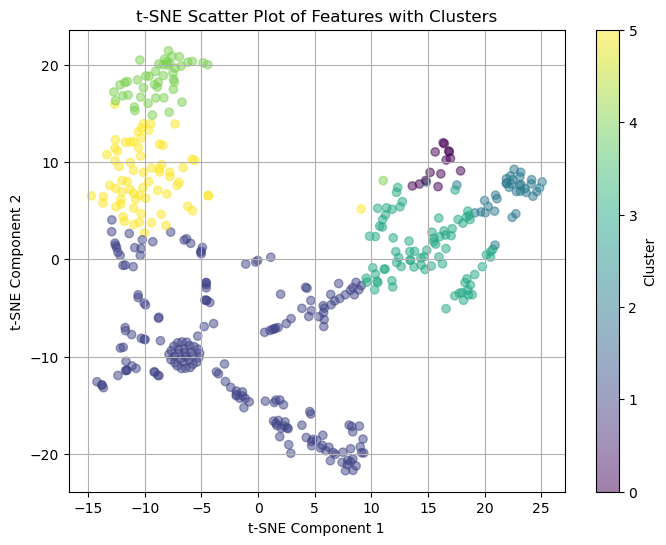

In [84]:
#new dataset
new_df
#centroids 
k = 6  # Number of clusters
centroids = new_df.sample(n = k, random_state = 0)

# loop that assess the convergence
for _ in range(100):  # Maximum iterations

# clusters'data points
    clusters = []
    for index, row in new_df.iterrows():
        min_distance = float('inf')
        closest_centroid = None
        for centroid_index, centroid in centroids.iterrows():
            distance = ((row - centroid) ** 2).sum() ** 0.5
            if distance < min_distance:
                min_distance = distance
                closest_centroid = centroid_index
        clusters.append(closest_centroid)

    # centroids updating
    new_centroids = []
    for cluster in set(clusters):
        cluster_data = new_df.iloc[[i for i, c in enumerate(clusters) if c == cluster]]
        new_centroid = cluster_data.mean()
        new_centroids.append(new_centroid)
    new_centroids = pd.DataFrame(new_centroids)

    # Checking convergence
    if centroids.equals(new_centroids):
        break

    centroids = new_centroids

# Final clusters
y_km = clusters

# Applying t-SNE to reduce dimensionality to 2 dimensions
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(new_df)

# Plot the scatter plot with all clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_km, cmap='viridis', alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Scatter Plot of Features with Clusters')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

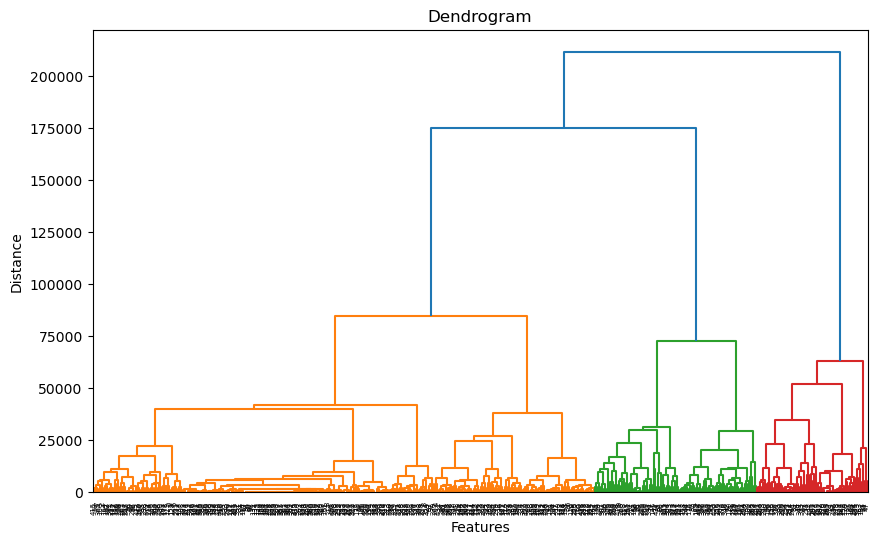

In [60]:
# using 'ward' linkage to perform hierarchical clustering
linked = linkage(new_df, 'ward')  

# dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()


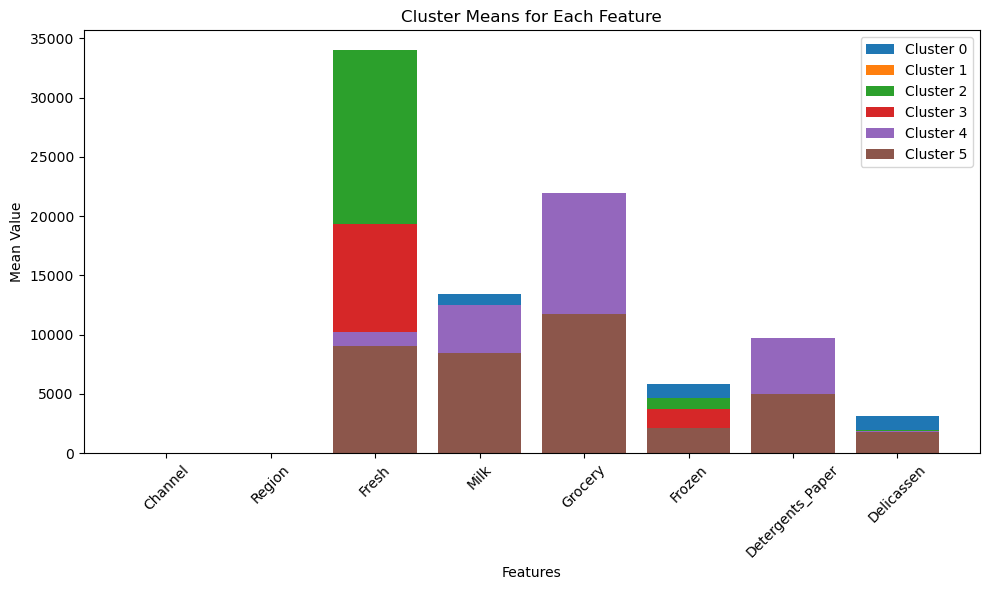

In [63]:
clustered_df = new_df.copy()
clustered_df['cluster'] = clusters  

# Grouping by cluster and calculate mean of each feature within each cluster
cluster_means = clustered_df.groupby('cluster').mean()

#cluster_means gives values of each feature within each cluster
plt.figure(figsize=(10, 6))

# plotting the mean values of features
for cluster_label, cluster_mean in cluster_means.iterrows():
    plt.bar(new_df.columns, cluster_mean, label=f'Cluster {cluster_label}')

plt.title('Cluster Means for Each Feature')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Dendogram shows us important insights into the tree of hierarchical clusters that are formed by default if we use 'ward' linkage. To better understand which feature produce which clusters and their relationship, we plotted it on a bar plot and it definetely gave us important insights. 
2. Features like Fresh and Frozen are found in many clusters compared to the remaining features
3. As opposed to Grocery and Detergets_Paper which only make two clusters

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

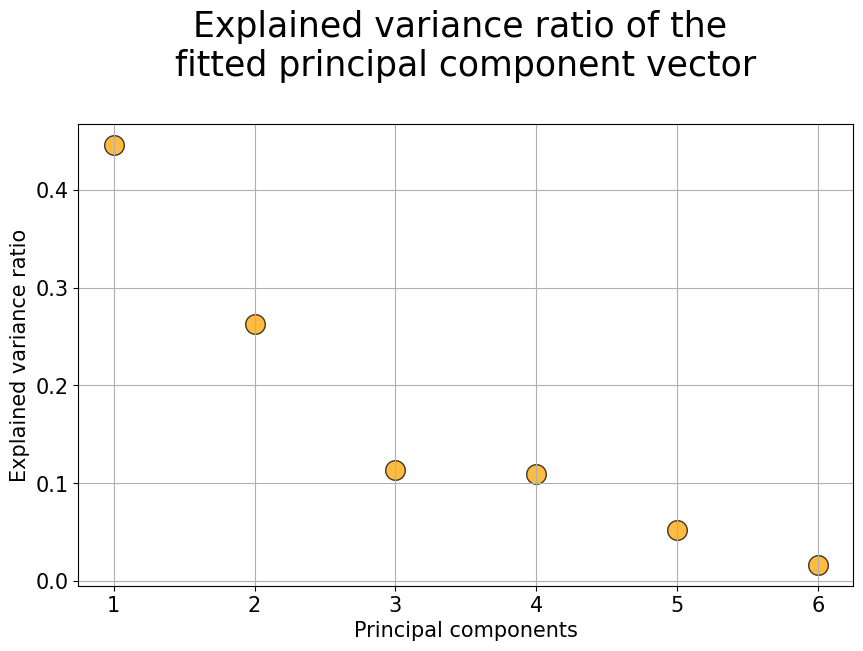

In [89]:
# Pre-processing using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(new_df)
dfx = pd.DataFrame(data=X_scaled)

# PCA
pca = PCA(n_components=dfx.shape[1])  
dfx_pca = pca.fit_transform(dfx)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x=[i + 1 for i in range(len(pca.explained_variance_ratio_))],
            y=pca.explained_variance_ratio_,
            s=200, alpha=0.75, c='orange', edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n", fontsize=25)
plt.xlabel("Principal components", fontsize=15)
plt.xticks([i + 1 for i in range(len(pca.explained_variance_ratio_))], fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio", fontsize=15)
plt.show()



PCA's plot is crucial in determining the variance of every feature. Now we can see that the how much variance of each feature is found in the original dataset. Clearly, the first 2 features make over 70 percentage while the last two are less significant. We would take this information and combine it with others to learn more about our clusters. 

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

These are the insights from the model and EDA explorations: 

1. Both K-Means clustering and Hierarchical clustering interestingly shows us how the clusters are formed in our dataset. However, Hierarchical clustring clarifies it even further by helping us attribute which clusters are related to which features in our data.
2. There are some clusters that share the same tree node which signifies strong relationship among them. Features like Fresh, Milk, Grocery, and Frozen share the same nodes and it shows that they have strong relationship.
3. PCA shows another crucial information: how much of the feature contribute to the dataset. From that we can deduce that features like Fresh, Milk, and Grocery definetely makes a good percentage of our dataset while the remaining three make less. It is easily visualized in the dendrogram above.
4. Features like Fresh and Frozen are found in many clusters compared to the remaining features as opposed to Grocery and Detergets_Paper which only make two clusters

Conclustion: Products in the Fresh, Milk, and Grocery categories are popular among the customers and they make a big number of the wholesale distributor's sales. Fresh and Frozen are found in many clusters compared to other features. This means that no matter what buyers are buying, they most likely end up purchasing Fresh and Frozen as well. 